In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('diabetes satu.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(diabetes_data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Diabetes']


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2035 non-null   int64  
 1   Glucose                   2035 non-null   int64  
 2   BloodPressure             2035 non-null   int64  
 3   SkinThickness             2035 non-null   int64  
 4   Insulin                   2035 non-null   int64  
 5   BMI                       2035 non-null   float64
 6   DiabetesPedigreeFunction  2035 non-null   float64
 7   Age                       2035 non-null   int64  
 8   Diabetes                  2035 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 143.2 KB


In [4]:
x = diabetes_data.drop(["Diabetes"], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y = diabetes_data['Diabetes']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diabetes, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)
print('Train set:',x_train.shape, y_train.shape)
print('Test set:',x_test.shape, y_test.shape)

Train set: (1424, 8) (1424,)
Test set: (611, 8) (611,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[324  72]
 [ 80 135]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       396
           1       0.65      0.63      0.64       215

    accuracy                           0.75       611
   macro avg       0.73      0.72      0.72       611
weighted avg       0.75      0.75      0.75       611



Predicted,0,1,All
Actual,,,
0,324,72,396
1,80,135,215
All,404,207,611


In [10]:
accuracy=(324+135)/611
accuracy

0.7512274959083469

Text(0, 0.5, 'Mean Error')

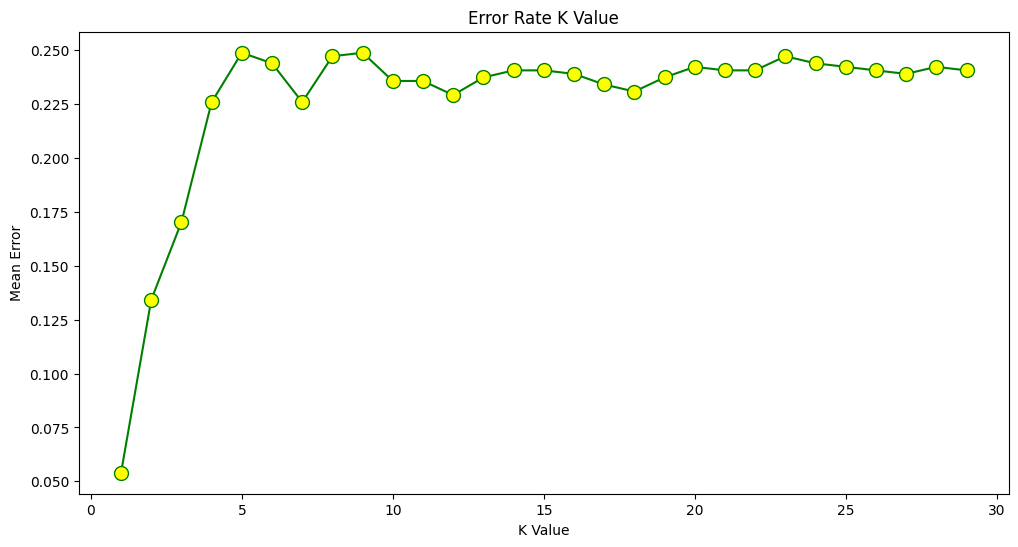

In [11]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [12]:
yhat = knn.predict(x_test)
yhat[0:50]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0])

In [13]:
from sklearn import metrics
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confustion=[];
for n in range(1,Ks):
  neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
  yhat=neigh.predict(x_test)
  mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)

  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94599018, 0.86579378, 0.82978723, 0.77414075, 0.7512275 ,
       0.75613748, 0.77414075, 0.75286416, 0.7512275 ])

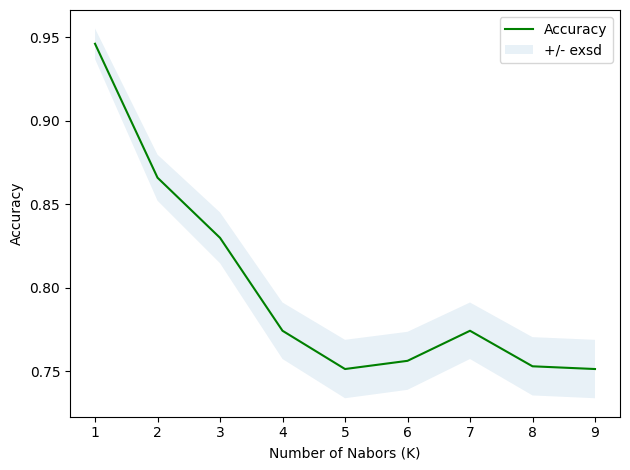

In [14]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1 *std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- exsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [15]:
print("The best accuracy was with", mean_acc.max(), "with k=",mean_acc.argmax()+1)

The best accuracy was with 0.9459901800327333 with k= 1
